# 🧭 Adaptive Kalman Filters

## ⚙️ Standard Kalman Filter Steps

### **1️⃣ Prediction (Time Update)**

Predict next state and its uncertainty:

$$
\hat{x}_{k|k-1} = F_k \hat{x}_{k-1|k-1} + B_k u_k
$$

$$
P_{k|k-1} = F_k P_{k-1|k-1} F_k^T + \color{red}{Q_k}
$$

### **2️⃣ Update (Measurement Correction)**

Compute the innovation:

$$
\tilde{y}_k = z_k - H_k \hat{x}_{k|k-1}
$$

Compute its covariance and the Kalman gain:

$$
S_k = H_k P_{k|k-1} H_k^T + \color{red}{R_k}
$$

$$
K_k = P_{k|k-1} H_k^T S_k^{-1}
$$

Update the state estimate and its covariance:

$$
\hat{x}_{k|k} = \hat{x}_{k|k-1} + K_k \tilde{y}_k
$$

$$
P_{k|k} = (I - K_k H_k) P_{k|k-1}
$$



## 💡 Why *Adaptive* Kalman Filters?

Classical formulation: **$Q_k$** & **$R_k$**  $\rightarrow$ assumed **known and constant**.  
Real systems: **$Q_k$** & **$R_k$** can change over time — sensors degrade, operating conditions shift, or models become inaccurate.

**Adaptive Kalman Filters (AKF)** dynamically **estimate or tune** these covariances online, maintaining accurate filtering even when the environment or system behavior evolves.

**Key Idea**:  Extend the standard Kalman filter by **adjusting the noise covariances**  

# 🔄 Categories of Adaptive Kalman Filters

| Type | Adapts | Key Idea | Typical Use |
|------|---------|-----------|--------------|
| Innovation-Based Adaptive Estimation (IAE) | $Q$, $R$ | Match residual statistics | General-purpose |
| Expectation–Maximization (EM) / Maximum Likelihood (ML) | $Q$, $R$ | Maximize measurement likelihood | Offline tuning |
|  Multiple-Model Adaptive Estimation (MMAE) | Model, $Q$, $R$ | Parallel filters, weighted by probability | Mode switching |
| Covariance Matching | $R$ | Match theoretical vs empirical covariances | Sensor calibration |
| Bayesian Adaptive | $Q$, $R$ | Full probabilistic inference | Research / small systems |
---



# 🔧 Innovation-Based Adaptive Estimation (IAE) Methods

## ⚙️ 1️⃣ Residual (Innovation) Variance Matching

Match the **empirical innovation covariance** to the **theoretical** one:

$$S_k = H_k P_{k|k-1} H_k^T + R_k.$$

**Key idea:**  
If residuals are larger or smaller than expected, adjust **$R_k$** (and optionally **$Q_k$**) to make the innovation statistics consistent with the model.

**Typical update (for measurement noise):**
$$
\hat{R}_k = \alpha \hat{R}_{k-1} + (1 - \alpha)\big[\tilde{y}_k \tilde{y}_k^T - H_k P_{k|k-1} H_k^T\big]
$$
where $0 < \alpha < 1$ as a forgetting factor (e.g., 0.95–0.99).

- **Simple, low-cost** way to adapt sensor noise ($R_k$).  
- Works well when process noise ($Q_k$) is relatively stable.

---

## ⚙️ 2️⃣ Sage–Husa-type Adaptive Filter
**Fully recursive innovation-based method** that updates both **$Q_k$** and **$R_k$** over time:

$$
\begin{aligned}
\hat{R}_k &= \beta \hat{R}_{k-1} + (1-\beta)\big[(\tilde{y}_k - \bar{v}_k)(\tilde{y}_k - \bar{v}_k)^T - H_k P_{k|k-1} H_k^T\big] \\
\hat{Q}_k &= \beta \hat{Q}_{k-1} + (1-\beta)\big[K_k(\tilde{y}_k - \bar{v}_k)(\tilde{y}_k - \bar{v}_k)^T K_k^T + P_{k|k} - F_k P_{k-1|k-1} F_k^T\big]
\end{aligned}
$$

**Key idea:**  
Use a **forgetting factor $\beta$** (close to 1) to balance between past estimates and new information.

**When to use:**  
- When both $Q_k$ and $R_k$ are uncertain or slowly time-varying.  
- Common in **real-time or embedded implementations** where the filter must self-tune.

## ⚙️ 3️⃣ Adaptive Fading / Covariance Inflation Triggered by Innovation

When innovation magnitudes suddenly increase, the model may have become overconfident.  
To recover, **inflate** the predicted covariance using a fading factor **$\lambda_k \ge 1$**:

$$
P_{k|k-1} \leftarrow \lambda_k P_{k|k-1}
$$

**Key idea:**  
Temporarily increase uncertainty so the filter can **respond faster** to new information  

**Practical adaptation rule:**
$$
\lambda_k = \min\!\left(\lambda_{\max},\, 1 + c\,\frac{\tilde{y}_k^T S_k^{-1}\tilde{y}_k - p}{p}\right)
$$
where $p$ is the measurement dimension and $c$ a small tuning constant.

**When to use:**  
- When system dynamics can **change abruptly** (maneuvers, faults, etc.).  
- Often combined with residual variance matching for robust tracking.


# Simple Kalman Filter Equations
##  System Model  

We assume a linear Model

$$
x_{k+1} = Ax_k+Bu_k+w_k
$$

The normal "Kalman" filter

Prediction
$$
\hat{x}_{k|k-1} = F_k\hat{x}_{k-1|k-1} + B_ku_k
$$

$$
P_{k|k-1} = F_kP_{k-1|k-1}F_k^T+Q_k
$$

Correction

$$
\tilde{y}_k = z_k - H_k\hat{x}_{k|k-1}\\
S_k = H_kP_{k|k-1}H_k^T+R_k \\
K_k = P_{k|k-1}H_k^TS_k^{-1} \\
\hat{x}_{k|k} = \hat{x}_{k|k-1} + K_k\tilde{y}_k \\
P_{k|k} = (I-K_kH_k)P_{k|k-1}
$$



## Adaptive Kalman filter
We assume we don't really know $R_k$ and $Q_k$!

### There are multiple methods, here are some
Based on https://arxiv.org/pdf/1702.00884

Residual Based Adaptive estimation of $R$

$$
R_k = S_k -  H_kP^{-}_kH_k^T
$$

THis does not guarantee a positive definit matrix ->
A better aproach is the residual based approach

$$
R_k = E[ϵ_kϵ_k^T] + H_kP^{-}_kH_k^T\\
ϵ_k = z_k -  H_k\hat{x}_{k|k-1}
$$
Use a Recursive Least squares similar approach with the forgetting factor

$$
R_k = \alpha R_{k-1} + (1-\alpha)(ϵ_kϵ_k^T + H_kP^{-}_kH_k^T)
$$

Innovation Based Adaptive estimation of $Q$
$$
w_{k-1} = x_k - Ax_{k-1} - Bu_{k-1}
$$

->

$$
\hat{w}_{k-1} = \hat{x}^+_k - A\hat{x}^+_{k-1} - Bu_{k-1}\\
\hat{w}_{k-1} = K_k\tilde{y}_k
$$

Which gives:
$$
E[\hat{w}_{k-1}\hat{w}_{k-1}^T] = K_kE[\tilde{y}\tilde{y}^T]K_k^T
$$
and therefore the estimate of Q as:
$$
Q_k = αQ_{k-1} + (1-α)(K_k\tilde{y}\tilde{y}^TK_k^T)
$$



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def rk4(f,h,x,*args):
    k1 = f(x,*args)
    k2 = f(x+k1*h/2, *args)
    k3 = f(x+k2*h/2, *args)
    k4 = f(x+k3*h, *args)
    return x + h*(k1+2*k2+2*k3+k4)/6

Q_ex = np.array([[0.01,0],[0,0.01]])*10

def second_order(x,u):
  c = 0.2
  m = 2
  k = 1.5
  dot =  np.array([-c/m*x[0]-k/m*x[1]+1/m*u, x[0]])
  w  = np.random.multivariate_normal(np.zeros(2), Q_ex)
  return dot + w


def sim(f, x0, u ,time=10, dt = 0.1):
  N = int(time/dt)
  x = [x0]
  if callable(u):
    u = u(np.arange(0,N*dt, dt))
  for i in range(len(u)):
    x.append(rk4(f,dt,x[-1],u[i]))
  x = np.array(x)
  return x[1:],u, np.arange(0,N*dt, dt)

def sine(t,t0=2):
  freq = 0.5
  return 2*np.sin(2*np.pi*freq*t+t0)

## Mass spring damper example
$$
\begin{bmatrix}
\dot{x}_1 \\ \dot{x}_2
\end{bmatrix}=
\begin{bmatrix}
  -c/m & -k/m \\
  1 & 0
\end{bmatrix}
\begin{bmatrix}
x_1 \\ x_2
\end{bmatrix}+
\begin{bmatrix}
1/m \\ 0
\end{bmatrix}*F\\
y = \textbf{cx} = [0,1]\begin{bmatrix}
x_1 \\ x_2
\end{bmatrix}=x_2
$$

$$
m = 2\\
c = 0.2\\
k = 1.5\\
$$


(100, 2)


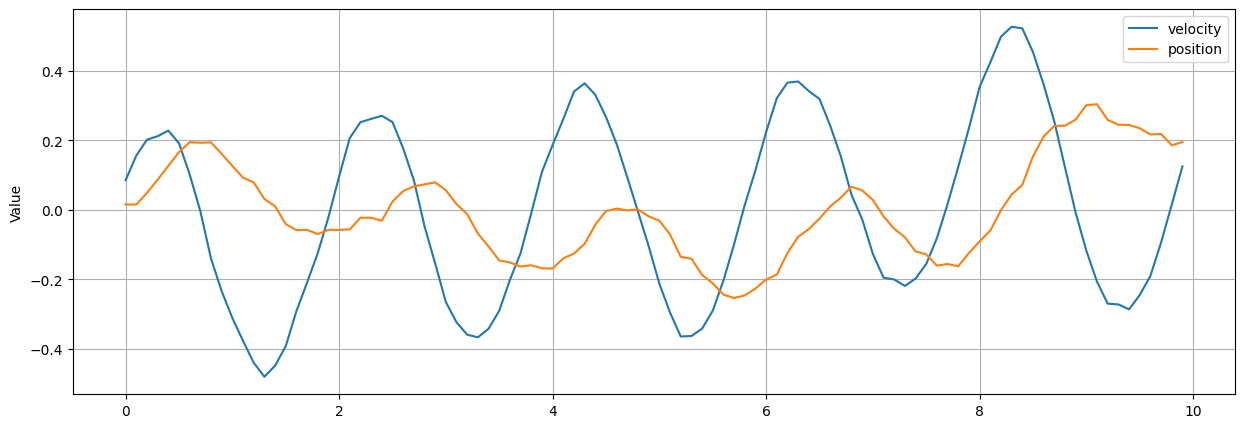

(100,)


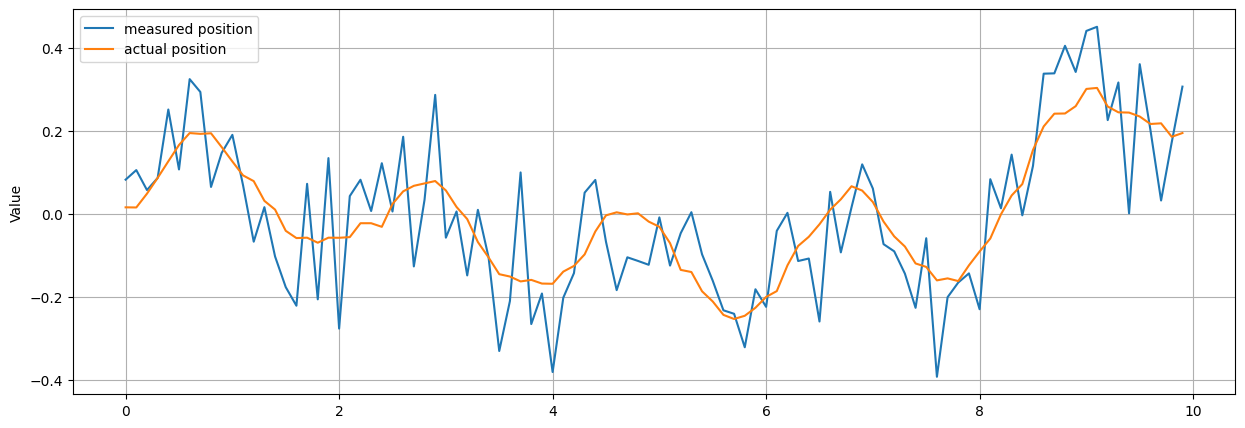

In [ ]:
x, u, t = sim(second_order, np.array([0,0]), sine)
print((x.shape))
plt.figure(figsize=(15,5))
plt.plot(t, x[:,0], label = 'velocity')
plt.plot(t,x[:,1], label = 'position')
plt.legend()
plt.grid(True)
plt.ylabel('Value')
plt.show()

mean  = 0.2
y = x[:, 1] + np.random.normal(0, 0.1, x[:, 1].shape)
print(y.shape)
plt.figure(figsize=(15,5))
plt.plot(t,y, label = 'measured position')
plt.plot(t,x[:,1], label = 'actual position')
plt.legend()
plt.grid(True)
plt.ylabel('Value')
plt.show()

## We implement a flawed model

*   List item
*   List item


$$
\hat{x}_{k|k-1} = F_k\hat{x}_{k-1|k-1} + B_ku_k
$$
$$
F = \begin{bmatrix}
  -\hat{c}/\hat{m} & -\hat{k}/\hat{m} \\
  1 & 0
\end{bmatrix}\\
B = \begin{bmatrix}
1/\hat{m} \\ 0
\end{bmatrix}
$$
$$
\hat{c} = 0.15\\
\hat{m} = 2.2\\
\hat{k} = 1.3
$$

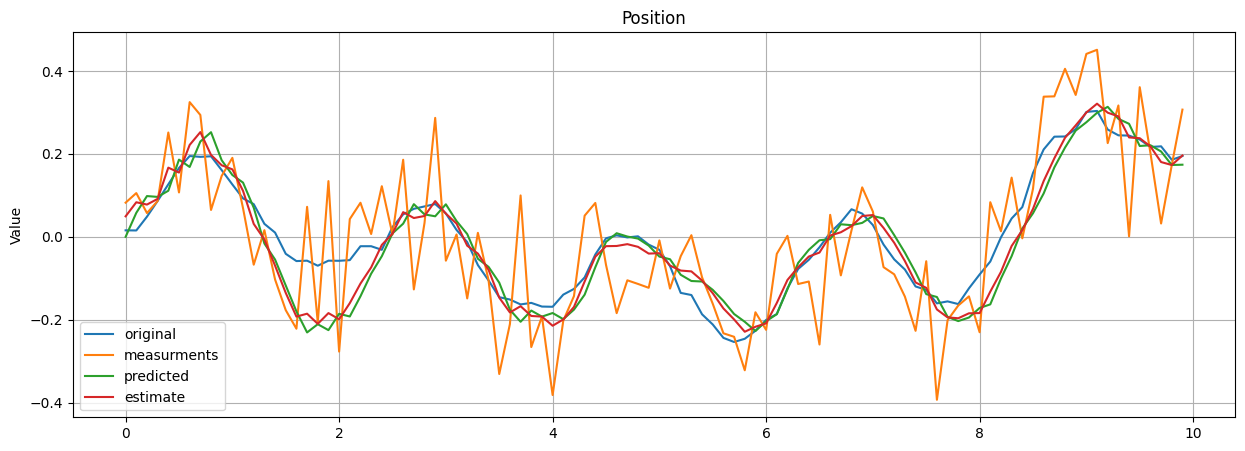

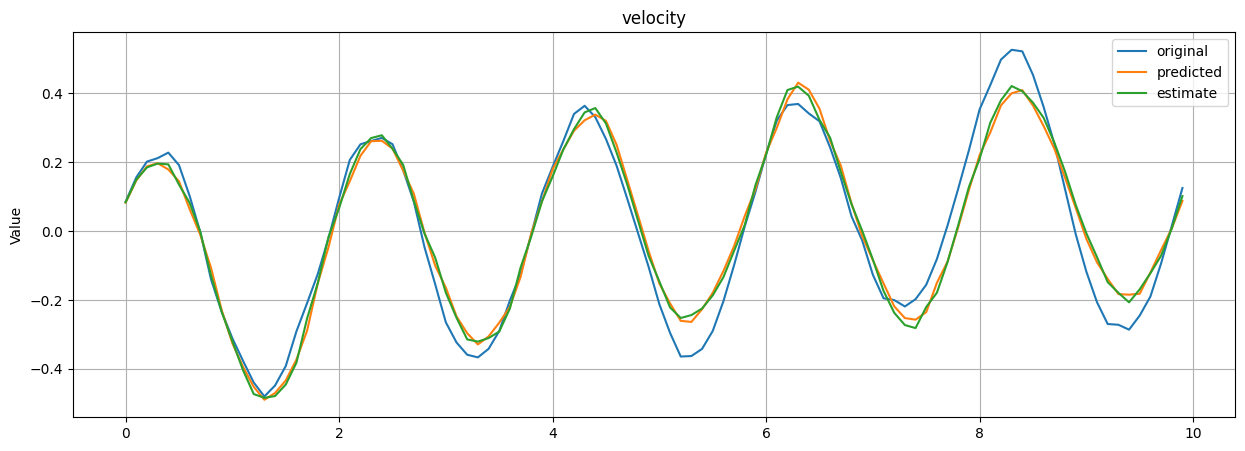

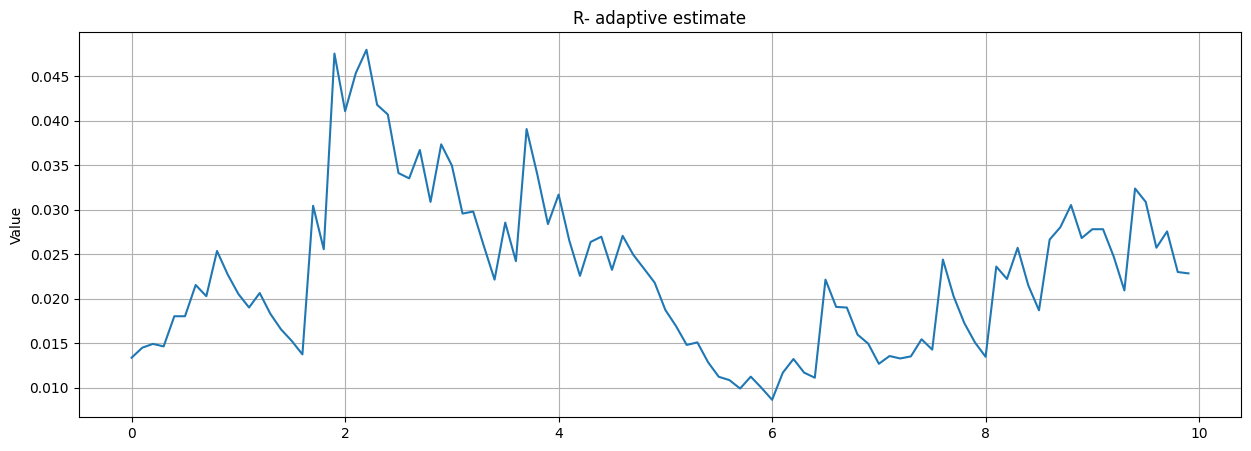

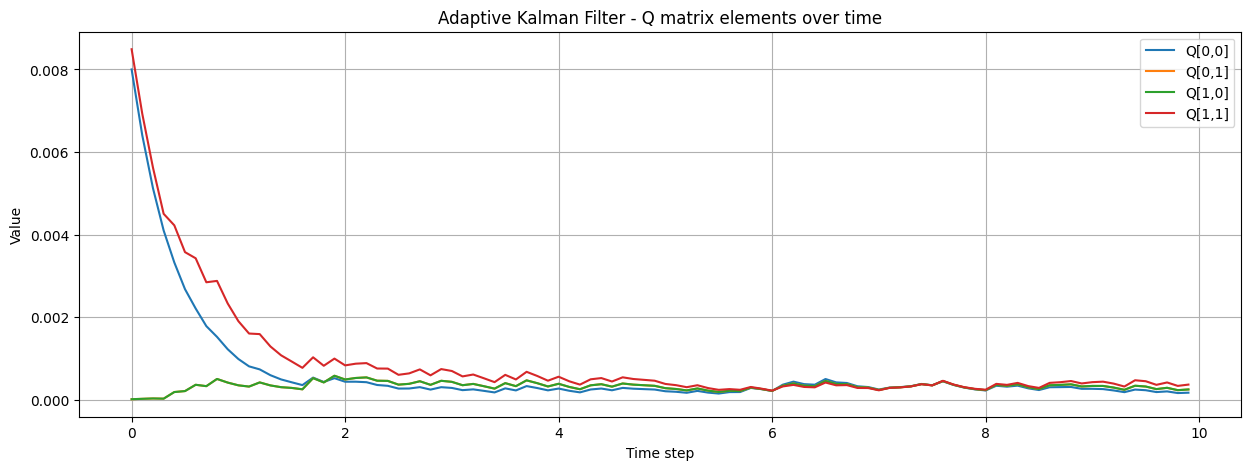

In [ ]:
c_hat = 0.15
m_hat = 2.2
k_hat = 1.3

Q_0 = np.array([[0.01,0],[0,0.01]])
R_0 = np.array([[0.01]])

F = np.array([[1-c_hat/m_hat*0.1, -k_hat/m_hat*0.1],[1*0.1,1]])

B = np.array([[1/m_hat*0.1],[0]])
x0 = np.array([[0],[0]])
p_0 = np.array([[0.01,0],[0,0.01]])

H = np.array([[0,1]])

a = 0.8 # Forgetting factor

R_list = []
Q_list = []

def second_order_hat(x,u):
  return np.dot(F,x)+np.dot(B,u)

x_h_pred = list()
x_h_est = list()
for k in range(len(y)):
  if k == 0:
    x_hat = x0
    p_hat = p_0
    Q = Q_0
    R = R_0

  ##predict
  x_pred = second_order_hat(x_hat,u[k])
  P_pred = np.dot(np.dot(F,p_hat),F.T)+Q
  x_h_pred.append(x_pred)

  ## Measure

  v = y[k] - np.dot(H,x_pred)

  R = a*R + (1-a)*(np.dot(v,v.transpose())+np.dot(np.dot(H,P_pred),H.T))
  S = np.dot(np.dot(H,P_pred),H.T)+R

  R_list.append(R)

  K = np.dot(np.dot(P_pred,H.T),np.linalg.inv(S))
  x_hat = x_pred + np.dot(K,v)
  Q = a*Q + (1-a)*np.dot(np.dot(K,np.dot(v,v.T)),K.T)
  Q_list.append(Q)
  p_hat = (np.eye(2)-np.dot(K,H))*P_pred
  x_h_est.append(x_hat)


#print(np.array(x_h_est))
plt.figure(figsize=(15,5))
plt.title('Position')
plt.plot(t,x[:,1], label = 'original')
plt.plot(t,y, label = 'measurments')
plt.plot(t,np.array(x_h_pred)[:,1], label = 'predicted')
plt.plot(t,np.array(x_h_est)[:,1], label = 'estimate')
plt.legend()
plt.grid(True)
plt.ylabel('Value')
plt.show()

plt.figure(figsize=(15,5))
plt.title('velocity')
plt.plot(t,x[:,0], label = 'original')
plt.plot(t,np.array(x_h_pred)[:,0], label = 'predicted')

plt.plot(t,np.array(x_h_est)[:,0], label = 'estimate')
plt.legend()
plt.grid(True)
plt.ylabel('Value')
plt.show()
plt.figure(figsize=(15,5))
plt.title('R- adaptive estimate')
plt.plot(t, np.array(R_list)[:,0])
plt.ylabel('Value')
plt.grid(True)
plt.show()

Q_array = np.array(Q_list)
plt.figure(figsize=(15,5))
plt.plot(t,Q_array[:,0,0], label='Q[0,0]')
plt.plot(t,Q_array[:,0,1], label='Q[0,1]')
plt.plot(t,Q_array[:,1,0], label='Q[1,0]')
plt.plot(t,Q_array[:,1,1], label='Q[1,1]')
plt.xlabel('Time step')
plt.ylabel('Value')
plt.title('Adaptive Kalman Filter - Q matrix elements over time')
plt.legend()
plt.grid(True)
plt.show()



